## Iris Classification with Scikit-Learn's K-Means Implementation
- Author: Ian Kirkman
- Last Updated: 5/28/19
- Reviewer: Kate Hertweck

### Project Overview

This is a basic example of a data analysis project, built from the Fred Hutch [template](https://github.com/FredHutch/wiki-templates/tree/master/DataAnalysis-Python-Template).

The goal of this data analysis is to classify the iris dataset into feature clusters, using scikit-learn's implementation of the k-means algorithm. We will also use the interactive functionality of Jupyter notebooks and widgets to explore some simple parameter tuning.

Some background information on k-means clustering can be found [on the web](https://en.wikipedia.org/wiki/K-means_clustering), and specific details of the parameters and implementation can be found in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The iris dataset is publicly available in many different locations. For this analysis, we used the [UCI version](https://archive.ics.uci.edu/ml/datasets/iris). The dataset contains 150 samples of 3 classes of iris, each described by 4 features: sepal length, sepal width, petal length, and petal width.

Several existing packages are showcased in this interactive notebook, including:
 - [scikit-learn](https://scikit-learn.org): for machine learning algorithms, in this case we use k-means classification
 - [numpy](https://www.numpy.org) and [pandas](https://pandas.pydata.org): for fast data and array manipulation
 - [urllib](https://docs.python.org/3/library/urllib.html): for web file handling
 - [matplotlib](https://matplotlib.org): for plotting
 - [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html): for interactive widget functionality
 
### 1. Import libraries
We start by importing the necessary packages and setting a notebook property to allow matplotlib plotting directly within the Jupyter notebook:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.cluster import KMeans
from urllib.request import urlopen

### 2. Read Data

We can now use urllib and panda's `read_csv()` function to read the raw iris data from our web source. Since this csv file does not contain headers, we set the pandas column names according to the UCI documentation.

Since we are reading the data in from the web and not saving it locally, we do not need to designate it into the project's raw_data folder. However, we still include 'raw' in the name of the dataframe to maintain that this data is not manipulated or processed by our analysis.

After reading the data, we run the `head()` function to inspect the top 5 rows to confirm that the file was read appropriately.

In [2]:
raw_iris_df = pd.read_csv(urlopen(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'), header=None)
raw_iris_df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
raw_iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Process Data

Our processed data will be split into a training set $X$, of the four quantitative features, and the set of iris classifications we will call $Y$. Utilizing numpy's [array slicing](https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/) is a straightforward way to complete this task. Fortunately, the conversion between a pandas dataframe and numpy array is also quite straightforward, using the `values` property of the dataframe.

Below, we use the 'proc_' prefix to denote that we are working with processed data. (The raw dataset should remain unchanged by our analysis).

In [3]:
proc_iris_np = raw_iris_df.values
X = proc_iris_np[:,:4]
Y = proc_iris_np[:,4:]

Additionally, we'll want a numeric encoding of the classifications in $Y$ so we can easily apply a color map for our plots in Section 5. This can be achieved with some numpy and list operations:

In [4]:
# Obtain a list of all unique class labels for Y
Y_classes = np.unique(Y[:,0]).tolist()

# Encode Y numerically by the index of the class list
Y_nums = [Y_classes.index(i) for i in Y[:,0]]

### 4. Fit K-Means

Now we can fit our k-means model using our training set $X$. We'll call the resulting cluster labels array $\hat{Y}$.

In this case, we have knowledge of the number of classification groups on our dataset. However, this information may not always be available. We'll start out by setting the parameter smartly to 3, but later we'll explore what happens when having to guess the best value for this parameter.

We'll also set our random_state (seed) so the results are exactly reproducible as is.

In [5]:
kmeans_model = KMeans(n_clusters=3, random_state=0).fit(X)
Y_hat = kmeans_model.labels_

### 5. Plot Results

We can again use numpy array slicing, this time to choose subsets of 2 dimensions in the available 4 features of all the iris samples. With numeric encodings for our iris classifications, we can use color maps to compare the cluster results of $\hat{Y}$ versus the known classification of $Y$. (Note that the $\hat{Y}$ clusters are already represented numerically).

Now we can do a side-by-side comparison of $Y$ and $\hat{Y}$ color-mapped scatterplots, for the sepal width and length features:

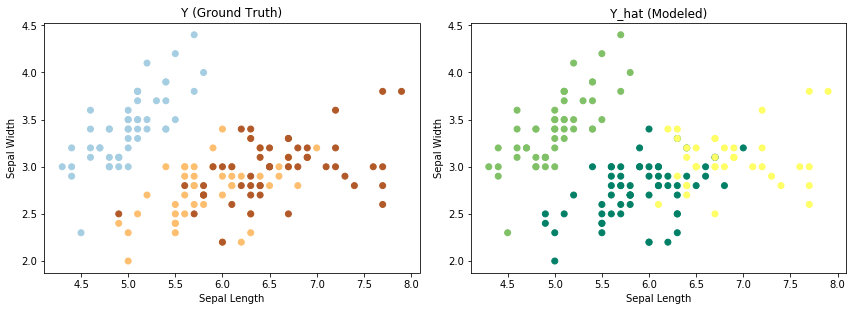

In [6]:
# Define a subplot grid with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

# First subplot is a scatterplot, assigning colors with Y_nums encoding
plt.subplot(1, 2, 1, aspect=1.0)
plt.scatter(X[:,0],X[:,1], c=Y_nums, cmap='Paired')
plt.title('Y (Ground Truth)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Second subplot is a scatterplot, assigning colors with Y_hat labels
plt.subplot(1, 2, 2, aspect=1.0)
plt.scatter(X[:,0],X[:,1], c=Y_hat, cmap='summer')
plt.title('Y_hat (Modeled)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Show the subplots
plt.tight_layout()
plt.show()

Similarly, we can plot our classifications given the petal length and width dimensions:

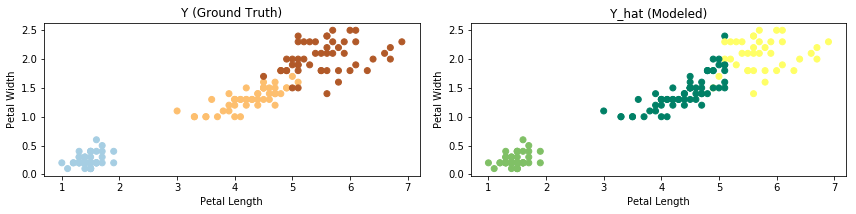

In [7]:
# Define a subplot grid with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

# First subplot is a scatterplot, assigning colors with Y_nums encoding
plt.subplot(1, 2, 1, aspect=1.0)
plt.scatter(X[:,2],X[:,3], c=Y_nums, cmap='Paired')
plt.title('Y (Ground Truth)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Second subplot is a scatterplot, assigning colors with Y_hat labels
plt.subplot(1, 2, 2, aspect=1.0)
plt.scatter(X[:,2],X[:,3], c=Y_hat, cmap='summer')
plt.title('Y_hat (Modeled)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Show the subplots
plt.tight_layout()
plt.show()

### 6. Interactive Parameter Tuning

We mentioned in Section 4 that we have insider knowledge about the expected number of clusters. In this section, we'll use interactive widgets to explore the outcomes with different parameter values. To do so, we'll first need to generalize our previous work into callable functions.

In [8]:
# Define constants from values above
X = X
X_SEPAL_DIMS = (X[:,0],X[:,1])
X_PETAL_DIMS = (X[:,2],X[:,3])
Y_NUMS = Y_nums
SEED = 0

def kmeans_tuning(n_clusters=3, plot_features='Sepal Plot'):
    """
    Fits scikit-learn's k-means model to processed data defined by constants above,
    then passes the modeled Y_hat values along with plot selection to the generalized
    plot function `plot_kmeans`.
    
    INPUT:
        n_clusters: the number of clusters to run in the k-means model
        plot_features: the desired subset of X features to view in the color-mapped
                       results, either 'Sepal Plot' or 'Petal Plot'
                       
    EXCEPTIONS:
        1. Catches ValueError for bad n_clusters input
        2. No exception is thrown for bad plot_features input (`plot_kmeans` will not be called)
        
    RETURNS:
        Nothing
    """
    # Fit the scikit-learn k-means model
    try:
        kmeans_model_local = KMeans(n_clusters=n_clusters, random_state=SEED).fit(X)
        Y_hat_local = kmeans_model_local.labels_
    except ValueError:
        print("ValueError: n_clusters should be a positive integer.")
        return
    
    # Direct the modeled results to the appropriate plot params
    if plot_features=='Sepal Plot':
        plot_kmeans(X_SEPAL_DIMS, Y_hat_local, 'Sepal')
    elif plot_features=='Petal Plot':
        plot_kmeans(X_PETAL_DIMS, Y_hat_local, 'Petal')
    else:
        return
    
def plot_kmeans(X_dims, Y_hat_local, axes_labels):
    """
    Plots side-by-side scatter plot comparison of Y and Y_hat color maps (true and 
    modeled Y classifications, denoted by hue). Scatter plot is 2D, so the subset of 
    dimensions of X (training data) to plot are provided in the X_dims parameter.
    
    X and Y are prerequisite constants defined above. Y_hat_local is passed as a
    parameter to this function.
    
    INPUT: 
        X_dims: (tuple) the two dimensions of X to plot
        Y_hat_local: the modeled cluster labels to plot
        axes_labels: 'Sepal' or 'Petal' depending on the dimensions of X that are plotted
        
    EXCEPTIONS:
        None
        
    RETURNS:
        Plots side-by-side comparison scatter plots of Y and Y_hat color mappings for 
        specified X-dimensions. If inline plotting is not enabled in the notebook, a 
        plot object will be returned.
    """
    # Define a subplot grid with one row and two columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

    # First subplot is a scatterplot, assigning colors with Y_nums encoding
    plt.subplot(1, 2, 1, aspect=1.0)
    plt.scatter(X_dims[0], X_dims[1], c=Y_NUMS, cmap='Paired')
    plt.title('Y (Ground Truth)')
    plt.xlabel('%s Length'%axes_labels)
    plt.ylabel('%s Width'%axes_labels)

    # Second subplot is a scatterplot, assigning colors with Y_hat labels
    plt.subplot(1, 2, 2, aspect=1.0)
    plt.scatter(X_dims[0], X_dims[1], c=Y_hat_local, cmap='summer')
    plt.title('Y_hat (Modeled)')
    plt.xlabel('%s Length'%axes_labels)
    plt.ylabel('%s Width'%axes_labels)

    # Show the subplots
    plt.tight_layout()
    plt.show()

With our code generalized into functions, we can adjust the default parameters to view the impact to the model results. We could do this manually, but instead we will showcase some simple widgets to interactively update the model and plots. Please use the slider and drop-down below to explore different parameters.

Below, we used the default settings for a simple widget framework in one line of code. Some projects will require additional widget options or customizations. Details for building your own widgets from the ipywidgets library can be found in [the ipywidgets documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html).

In [9]:
widgets.interact(kmeans_tuning, n_clusters=(1,9), plot_features=['Sepal Plot','Petal Plot'])

interactive(children=(IntSlider(value=3, description='n_clusters', max=9, min=1), Dropdown(description='plot_f…

<function __main__.kmeans_tuning(n_clusters=3, plot_features='Sepal Plot')>